In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from sklearn import datasets

In [4]:
moons =datasets.make_moons(n_samples=1500,noise=.05)

In [5]:
x,y = moons

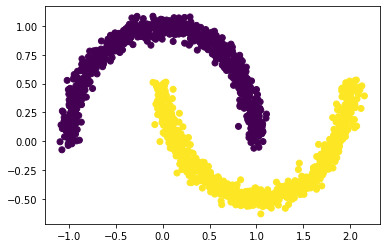

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

In [8]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

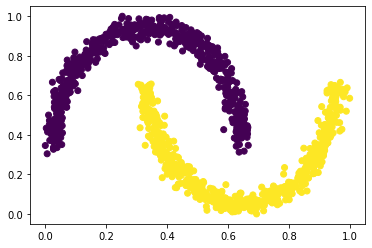

In [15]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1],c=y_train)

In [16]:
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam') 
model.fit(x_train,y_train,epochs=500,verbose=2)

Epoch 1/500
36/36 - 2s - loss: 0.7205 - 2s/epoch - 51ms/step
Epoch 2/500
36/36 - 0s - loss: 0.6989 - 105ms/epoch - 3ms/step
Epoch 3/500
36/36 - 0s - loss: 0.6789 - 101ms/epoch - 3ms/step
Epoch 4/500
36/36 - 0s - loss: 0.6599 - 91ms/epoch - 3ms/step
Epoch 5/500
36/36 - 0s - loss: 0.6415 - 92ms/epoch - 3ms/step
Epoch 6/500
36/36 - 0s - loss: 0.6239 - 89ms/epoch - 2ms/step
Epoch 7/500
36/36 - 0s - loss: 0.6075 - 86ms/epoch - 2ms/step
Epoch 8/500
36/36 - 0s - loss: 0.5916 - 92ms/epoch - 3ms/step
Epoch 9/500
36/36 - 0s - loss: 0.5769 - 95ms/epoch - 3ms/step
Epoch 10/500
36/36 - 0s - loss: 0.5628 - 103ms/epoch - 3ms/step
Epoch 11/500
36/36 - 0s - loss: 0.5496 - 84ms/epoch - 2ms/step
Epoch 12/500
36/36 - 0s - loss: 0.5367 - 82ms/epoch - 2ms/step
Epoch 13/500
36/36 - 0s - loss: 0.5246 - 73ms/epoch - 2ms/step
Epoch 14/500
36/36 - 0s - loss: 0.5130 - 83ms/epoch - 2ms/step
Epoch 15/500
36/36 - 0s - loss: 0.5021 - 130ms/epoch - 4ms/step
Epoch 16/500
36/36 - 0s - loss: 0.4917 - 94ms/epoch - 3ms/ste

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
y_predict = model.predict(x_test_scaled)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test,y_predict.round())

<AxesSubplot:>

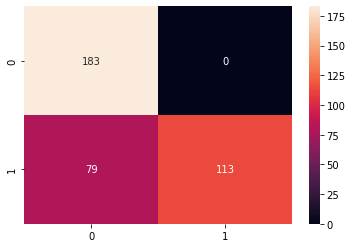

In [21]:
sns.heatmap(cm,annot=True,fmt="d")

In [23]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       183
           1       1.00      0.59      0.74       192

    accuracy                           0.79       375
   macro avg       0.85      0.79      0.78       375
weighted avg       0.85      0.79      0.78       375

